In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [20]:
cols = ['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years']
cancer_df=pd.read_csv('dataset/haberman.csv',names=cols)
print(cancer_df)


     age  year_of_treatment  positive_lymph_nodes  \
0     30                 64                     1   
1     30                 62                     3   
2     30                 65                     0   
3     31                 59                     2   
4     31                 65                     4   
..   ...                ...                   ...   
301   75                 62                     1   
302   76                 67                     0   
303   77                 65                     3   
304   78                 65                     1   
305   83                 58                     2   

     survival_status_after_5_years  
0                                1  
1                                1  
2                                1  
3                                1  
4                                1  
..                             ...  
301                              1  
302                              1  
303                           

### Domain Knowledge:
1. Number of Axillary nodes(Lymph Nodes)
2. Age
3. Operation Year
4. Survival Status

**Lymph Node**: Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)

**Age**: It represent the age of patient at which they undergone surgery (age from 30 to 83)

**Operation year**: Year in which patient was undergone surgery(1958–1969)

**Survival Status**: It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.

# General information on the dataset

In [15]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          306 non-null    int64
 1   op_year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


# Observation: 
- There are no missing values in this dataset. So there is no need to do data imputation.
- The datatype of 'survival_status_after_5_years' column is integer. It has to be converted to categorical datatype.
- The values of 'survival_status_after_5_years' column are not meanigful. Hence they are mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years)

# Balanced-dataset vs imbalanced dataset

In [21]:
cancer_df['survival_status_after_5_years'].value_counts()

1    225
2     81
Name: survival_status_after_5_years, dtype: int64

- This is imbananced dataset

# Basic  Statistic performs on the Dataset

In [22]:
cancer_df.describe()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# 1) Univariate Analysis

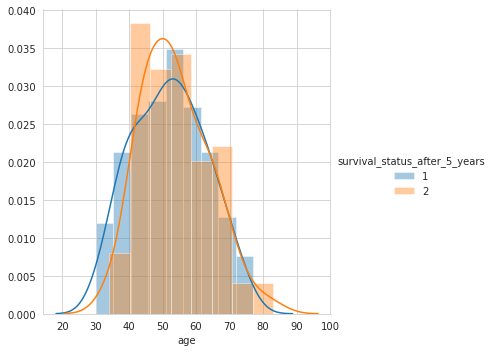

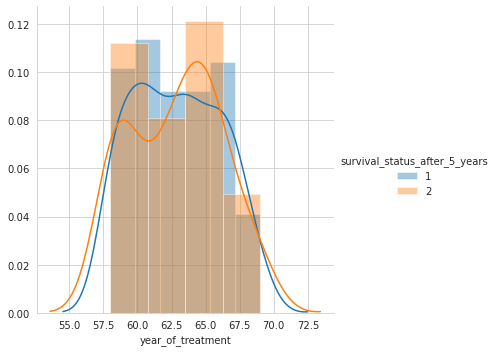

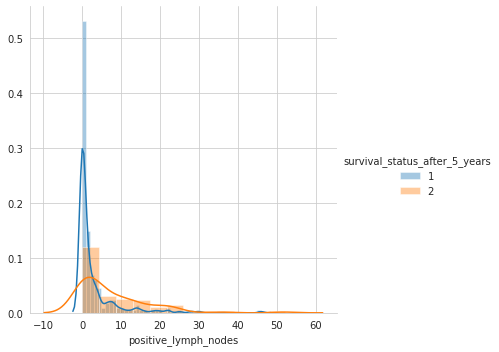

In [25]:
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    fg = sns.FacetGrid(cancer_df, hue='survival_status_after_5_years', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

# 2) CDF

_________age__________
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
_________year_of_treatment__________
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
_________positive_lymph_nodes__________
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 

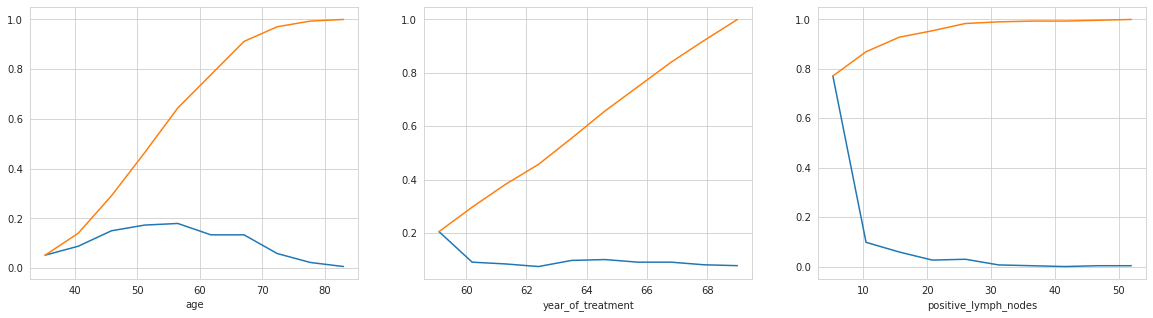

In [27]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("_________"+feature+"__________")
    counts, bin_edges = np.histogram(cancer_df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

# 3)  Box Plot

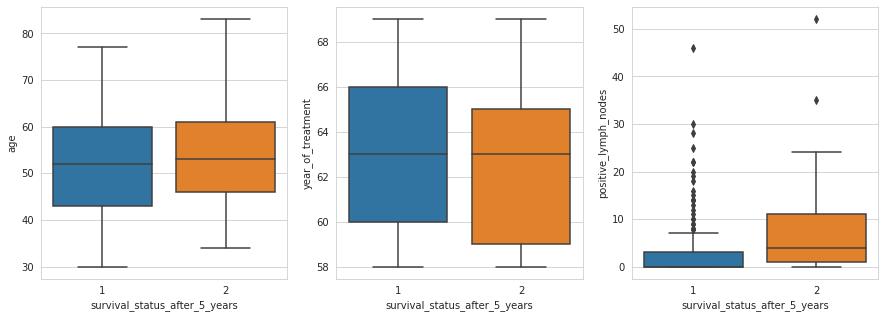

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    sns.boxplot( x='survival_status_after_5_years', y=feature, data=cancer_df, ax=axes[idx])
plt.show()  

# Observation: 
- The number of positive lymph nodes of the survivors is highly densed from 0 to 5.(#1)
- Almost 80% of the patients have less than or equal to 5 positive lymph nodea. (#2)
- The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest. (#3 )

# Bivariate and Multivariate Analysis

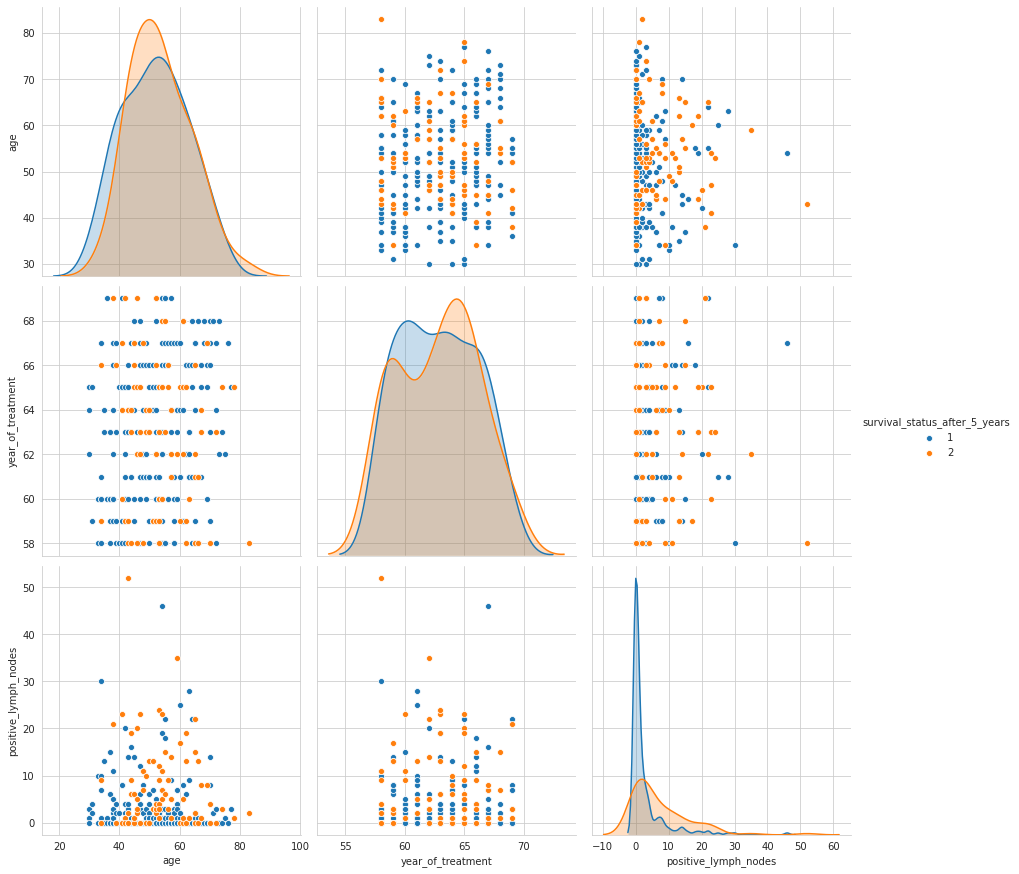

In [31]:
sns.pairplot(cancer_df, hue='survival_status_after_5_years', size=4)
plt.show()

# Observation: 
- This doesn't give much information as most of the feature overlap each other.
- By scattering the data points between year_of_treatment and positive_lymph_nodes, we can see the better seperation between the two clases than other scatter plots.